In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap




In [2]:
N = 64
T = 200
r = 0.5
p_loss = 0.5
c = np.round(np.arange(0.1,1,0.1),1)


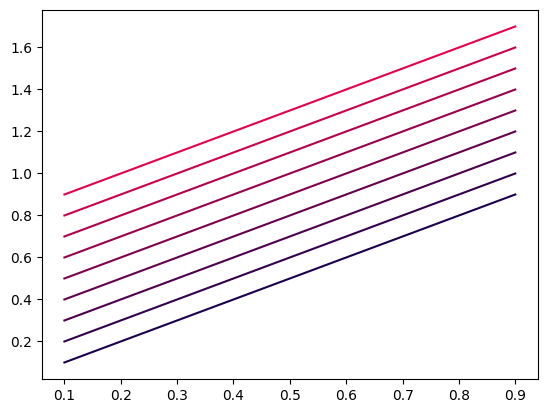

In [3]:
for i in range(len(c)):
    plt.plot(c,c + i/10., c = [c[i],0,0.3])

In [4]:
Random = np.load("Slices_random_N="+str(N)+".npy")
Random_mean = np.mean(Random, 0)

##  Top

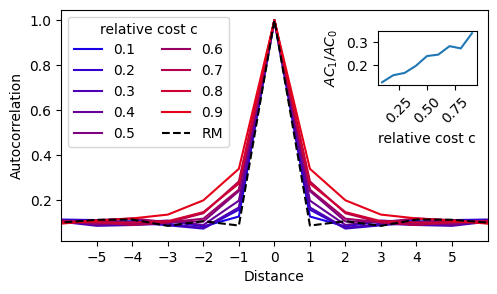

In [5]:
fig, ax1 = plt.subplots(figsize = (5.5,3))
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.7, 0.63, 0.18, 0.18]
ax2 = fig.add_axes([left, bottom, width, height])


AC_1_rich = np.zeros_like(c)

for c_index in c:
    #Slices_bottom = np.load("Slices_bottom_"+"N="+str(N)+"_T="+str(T)+"_c="+str(c)+"_r="+str(r)+"_p_loss="+str(p_loss)+".npy")
    Slices_top = np.load("Slices_top_"+"N="+str(N)+"_T="+str(T)+"_c="+str(c_index)+"_r="+str(r)+"_p_loss="+str(p_loss)+".npy")

    MeanSlice = np.mean(Slices_top, axis = 0)
    AC_1_rich[c == c_index] = MeanSlice[int(N/2 -1)]/MeanSlice[int(N/2)]

    ax1.plot(np.arange(-32,32),MeanSlice/max(MeanSlice), label=str(c_index), c=[c_index,0,1-c_index])
ax2.plot(c, AC_1_rich)#/max(AC_1_poor))
ax2.set_xlabel("relative cost c")
ax2.tick_params("x",labelrotation=45)
ax2.set_ylabel(r"$AC_1/AC_0$")



ax1.plot(np.arange(-32,32), Random_mean/max(Random_mean), "--",label="RM", c="k")
ax1.legend(ncol=2, loc="upper left",title="relative cost c")
#plt.yscale("log")
ax1.set_ylabel("Autocorrelation")
ax1.set_xlabel("Distance")
ax1.set_xlim([-6,6])
ax1.set_xticks(range(-5,6))

plt.savefig("Slices_rich_autocorr_variable_c_N="+str(N)+"_T="+str(T)+"_r="+str(r)+"_p_loss="+str(p_loss)+".pdf" , bbox_inches = "tight" )
plt.show()

## Poor

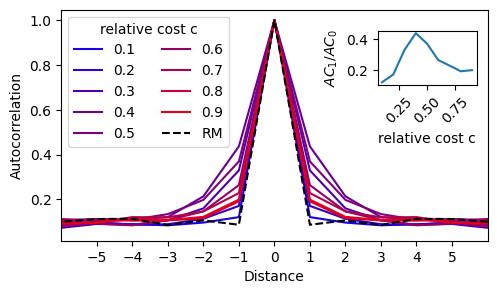

In [6]:
fig, ax1 = plt.subplots(figsize = (5.5,3))
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.7, 0.63, 0.18, 0.18]
ax2 = fig.add_axes([left, bottom, width, height])


AC_1_poor = np.zeros_like(c)
for c_index in c:
    Slices_bottom = np.load("Slices_bottom_"+"N="+str(N)+"_T="+str(T)+"_c="+str(c_index)+"_r="+str(r)+"_p_loss="+str(p_loss)+".npy")
    #Slices_top = np.load("Slices_top_"+"N="+str(N)+"_T="+str(T)+"_c="+str(c_index)+"_r="+str(r)+"_p_loss="+str(p_loss)+".npy")

    MeanSlice = np.mean(Slices_bottom, axis = 0)

    AC_1_poor[c == c_index] = MeanSlice[int(N/2 +1)]/MeanSlice[int(N/2)]

    ax1.plot(np.arange(-32,32),MeanSlice/max(MeanSlice), label=str(c_index), c=[c_index,0,1-c_index])
ax2.plot(c, AC_1_poor)#/max(AC_1_poor))
ax2.set_xlabel("relative cost c")
ax2.tick_params("x",labelrotation=45)
ax2.set_ylabel(r"$AC_1/AC_0$")



ax1.plot(np.arange(-32,32), Random_mean/max(Random_mean), "--",label="RM", c="k")
ax1.legend(ncol=2, loc="upper left",title="relative cost c")
#plt.yscale("log")
ax1.set_ylabel("Autocorrelation")
ax1.set_xlabel("Distance")
ax1.set_xlim([-6,6])
ax1.set_xticks(range(-5,6))


plt.savefig("Slices_poor_autocorr_variable_c_N="+str(N)+"_T="+str(T)+"_r="+str(r)+"_p_loss="+str(p_loss)+".pdf", bbox_inches = "tight" )
plt.show()